# Exercise 3: Flow over and around a groyne

## Purpose 

In this exercise we consider the flow over and around a groyne. In many numerical river models, groynes are represented by weirs, where the theoretical weir loss is added to the governing equations to represent the energy loss due to the structure. It would thus be interesting to investigate whether a groyne has a similar energy loss as a weir. In constrast to the previous exercises, no analytical solution is present for this case. Additionally, this case is now also a real two-dimensional (2D) case, where the flow can vary in the lateral direction. 

As in the weir case, we consider two-dimensional flow with a ’subgrid’ weir. The difference is now that the weir extends only halfway across the channel, representing a groyne. Again, ’subgrid’ refers to the fact that the weir is represented as a thin wall on a cell edge. A different approach would be to represent the weir as an increased bed level in one/more cell(s), which would mean that the grid resolution would determine how well the weir is resolved. To avoid this, the weir is represented by a vertical ’wall’ on a cell face. In other words, the bottom topography is flat, i.e. all cells have a constant flat bed, only one cell edge (with two cell corners) has a raised bed level.

## Aim

For this exercise there are four aims. 

1) Investigate how the energy loss due to a groyne compares to that of a weir. Does a groyne behave like a weir? <br>
2) Investigate how the energy loss due to the groyne depends on the boundary conditions. <br>
3) Investigate whether for a submerged groyne also a hydraulic jump develops as for the weir. <br>
4) Investigate the effect of the bottom friction coefficient on eddy dynamics. <br>

## Approach

The groyne can be emerged or submerged, depending on the upstream and downstream water levels (or the flow discharge). When the groyne is submerged, the flow can be compared to that over the weir, from the previous exercise, and the flow regime can again be subcritical (for high water stages and submergence ratios) or supercritical (for lower water stages). For the supercritical flow condition, the flow on top of the groyne will again be critical and and could think that the (specific) discharge (at least close to the groyne foot) would be close to the maximum possible discharge as it was computed for the weir case: $q_{critical}$. For the groyne, this specific discharge would be:

$q_{critical} = \frac{2}{3}E_{up}\sqrt{\frac{2}{3}gE_{up}}$ .

As one can see, this discharge would again be dependent only on the upstream energy head, as for the weir. However, the flow can also go around the groyne and the water upstream and downstream of the groyne are, therefore, connected. It can expected that the discharge over the groyne will only be independent of the downstream water level, if the flow adjacent to the groyne (in the main channel) is also supercritical, which it could become due to the flow contraction that is formed by the groyne. We will qualitatively analyze, whether the flow over and around the groyne has similarities with the weir case.

## Model description

The channel is the same channel as for the weir case, i.e. its length $L$ is 300 m and its width $B$ is 90 m. The Chézy coefficient is now chosen a bit lower (more rough bed) $C$ = 65 m$^{1/2}$/s. At the upstream boundary we will prescribe the a water level of $\zeta$ = 1.0 m and at the downstream boundary a water level of $\zeta$ = 0.7 m. For this case the groyne will be emerged, since the groyne crest height is 1.0 m above the bottom of the channel.

The channel is simulated on a moderately fine grid with cell sizes equal to 2.5 x 2.5 m. The grid and the rest of the model components are displayed in Figure 1.

<img src="figs/grid_with_groyne_bcs_obs_and_vel_vectors.png" alt="Drawing" style="float: left" style="width: 800px;"/>

Figure 1: Flow over and around a groyne: Computational grid, open boundaries and the position of the groyne. The bed level is 0.0 m (w.r.t. reference), except at the cell edges where the groyne is located, at which the bed level is 1.0 m (w.r.t. reference). The flow is from left to right. Colored velocity vectors are shown to illustrate the vortex shedding behind the groyne in the emerged case. The "eye" symbols mark the observation points used to study the output time series.

Now we can start the exercise. Follow the steps below to inspect the different model states (emerged and submerged groyne flow) and try different settings for the model parameters.

## Step 3a)

Specify a water level of $\zeta$ = 1.0 m at the upstream boundary and a water level of $\zeta$ = 0.7 m at the downstream boundary, corresponding to emerged groyne flow situation described above. Verify that indeed such a flow situation is reproduced by the model. What is the discharge through the channel?

In this case, we prescribed the energy loss in the channel to be $\zeta_{in} - \zeta_{out}$ = 0.3 m, just as for the weir case (where it was (2 - 1.7 = 0.3 m). The difference is now that the flow goes around the hydraulic structure. How does the discharge compare to that of the weir case ($Q$ = 163.182 m$^3$/s)? Can you explain the difference between the two cases?


## Step 3b)

What happens if we increase the Chézy bed roughness, lowering the bottom friction? Inspect what happens to the discharge.
What happens to the flow dynamics? 

You will notice that when lowering the bottom friction, the flow dynamics will increase, as was to be expected. At some point, the dynamics is, however, so large that the flow the downstream boundary starts interacting with the eddies that arrive at the boundary. This may result in flow instabilities. The boundary position has been chosen too close to the area of interest (the groyne) in this case. Usually, with the presence of sufficient damping through bottom friction, this will not occur. However, one should be aware that this can happen, when strong flow dynamics (e.g. vortex shedding or wave phenomena) interact with the boundary.

You can try to find a combination of boundary conditions and the bottom roughness, where this occurs.

## Step 3c)
                                                                                                                               
Now raise the upstream discharge and/or the downstream water levels. What happens to the flow, when the groyne gets submerged? Can you get it such that a hydraulic jump develops behind the groyne? What is then the velocity over the groyne (or the specific discharge)?

What happens if you raise the downstream water level further? Can you find the point (i.e. the value of the downstream water level) at which the groyne flow regime changes to "drowned groyne flow"?

Is the flow now indeed everywhere subcritical?

With this new downstream water level, what is now the discharge?
If you set the downstream water level to $\zeta$ = 2.0 m as in the weir case, can you find the upstream water level that provides the same discharge as in the weir case: $Q$ = 163.182 m$^3$/s?
Would you say that a submerged groyne behaves like a weir, providing a similar flow resistance?

This concludes the end of this exercise.

In [1]:
# Imports
import bmi
import bmi.wrapper
import ipywidgets as widgets
from ipywidgets import HBox, VBox, interactive, Layout, interact
import numpy as np
import time
import os

# Something very fishy happening if I don't define a plot first.
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
plt.ioff()
_ = plt.figure()
plt.ion()

# Toggle button for hiding the raw code
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')


In [2]:
# Get dflowfm software and model schematization
import os
mdu_file = r"3_Groyne\Models\groyne01_Q-H.mdu"

basepath = (os.path.abspath(os.path.join(os.getcwd(),"..","..")))
engine = os.path.join(basepath, r"dflowfm_exe\x64\share\bin\dflowfm")
mdufile = os.path.join(basepath, mdu_file) 

In [3]:
data = []
items = []
wrapper = bmi.wrapper.BMIWrapper(engine=engine, configfile=mdufile)
wrapper.initialize()

In [4]:
maxsteps = 500
parameters = [
    {
        "parameter": "zbndz",
        "description": "Boundary Water level Downstream $[m]$ ",
        "default": 0.7,
        "slice": np.arange(36)
    },    {
        "parameter": "zbndq",
        "description": "Boundary Discharge Upstream $[m^3/s]$ ",
        "default": 70,
        "slice": np.arange(36, 72)
    },    {
        "parameter": "frcu",
        "description": "Roughness Chézy $[m^{1/2}/s]$ ",
        "default": str(wrapper.get_var("frcu")[0])
    }
]

In [5]:
# for i in range(wrapper.get_var_count()):
#     print(wrapper.get_var_name(i), wrapper.get_var_shape(wrapper.get_var_name(i)), wrapper.get_var(wrapper.get_var_name(i)))

In [6]:
# Create widgets
style = {'description_width': 'initial'}

run = widgets.Button(
    description='Run model',
    button_style='',
    icon='play'
)
update = widgets.Button(
    description='Single update',
    button_style='',
    tooltip='Update with 1 timestep',
    icon='step-forward'
)
restart = widgets.Button(
    description='Restart model',
    button_style='',
    tooltip='Restart entire model with initial inputs',
    icon='retweet'
)

settings = widgets.HTML(
    value="Welcome!",
    placeholder='Input settings'
)

play = widgets.Play(
#     interval=10,
    value=0,
    min=0,
    max=int(wrapper.get_end_time()),
    step=1,
    description="Press play",
    disabled=False
)


nsteps = widgets.BoundedIntText(
    description="Number of timesteps",
    value=500,
    min=0,
    max=maxsteps,
    style=style,
    layout=Layout(width='15vw')
)

slider = widgets.IntSlider(  
    min=0,
    max=1,
    value=0
)

widgets.jslink((play, 'value'), (slider, 'value'))
player = widgets.HBox([play, slider])

# parameters = ["zbndz", "zbndq", "frcu"]
# p_descrip = ["Boundary Water level", "Boundary Discharge", "Roughness Chézy"]

items=[]
for p in parameters: 
    items.append(widgets.Text(
        description=p["description"],
        disabled=False,
        value=str(p["default"]),
        placeholder=p["parameter"],
        style=style,
        layout=Layout(width='50vw')
    ))

In [7]:
# Model specific function 
xz = wrapper.get_var('xz')[:]
yz = wrapper.get_var('yz')[:]
indy = np.argsort(yz)[::-1]
newx = xz[indy]

randind = np.random.choice(len(xz), int(len(xz)/5), replace=False)

lX = len(np.unique(xz))
lY = len(np.unique(yz))
newx = newx.reshape((lY, lX))
indx = np.argsort(newx, axis=1)

#     Automate parameter and grid sizes
def update_data():
    ucx = wrapper.get_var('ucx')[:]
    ucy = wrapper.get_var('ucy')[:]
    mag = np.sqrt(ucx.copy()**2 + ucy.copy()**2)

    mag = mag[indy]
    mag = mag.reshape((lY, lX))
    
    c = np.zeros_like((mag))

    for i, x in enumerate(mag):
        c[i, :] = mag[i, indx[i]]

    data.append(dict({
        "time": wrapper.get_current_time(),
        "ucx": ucx.copy(), 
        "ucy": ucy.copy(), 
        "mag": c,
    }))
    slider.max = len(data)
    settings.value = "Model update, timestep: {}".format(data[-1]["time"])
update_data()


In [8]:
# Standard functions for button widgets
dostop = False
def update_model(b=None):
#     Update the model with t = 1
    wrapper.update(wrapper.get_time_step())
    if(data[-1]["time"] != wrapper.get_current_time()):
        update_data()

def start_loop(n):
    print(n)
#     Start the loop for running the model continuously
#     while run.value == True: 
    for i in range(n):
        update_model()
        if (wrapper.get_current_time() >= wrapper.get_end_time()):
            stop_model()
            break
        if dostop == True: 
            stop_model()
            break
    stop_model()

def run_model(change=None): 
#     When the run/stop model button is pressed either start the model loop or stop it
    run.disabled = True
    update.disabled = True
    restart.disabled = True
    settings.disabled = True
    nsteps.disabled = True
    for i in items:
        i.disabled = True
    settings.disabled = True
    start_loop(int(nsteps.value))
#         thread = threading.Thread(target=start_loop)
#         thread.start()

def stop_model(change=None):
    update.disabled = False
    restart.disabled = False
    run.disabled = False
    settings.disabled = False
    nsteps.disabled = False
    for i in items:
        i.disabled = False
    dostop = True

def change_param(v):
    try:
        v = v.owner
    except AttributeError: 
        v = v
    if v.value == "":
        return
    try:
        float(v.value)
        old_par = wrapper.get_var(v.placeholder)
        new_par = np.ones_like(old_par) * float(v.value)
        wrapper.set_var(v.placeholder, new_par)
        settings.value = "Value ({}) has been set to: {}".format(v.description, new_par[0])
    except ValueError:
        v.value = str(next((x['default'] for x in parameters if x['parameter'] == v.placeholder), None))
        settings.value = "Not a correct input for {}".format(v.description)

def start_model():
#     start model
    wrapper = bmi.wrapper.BMIWrapper(engine=engine, configfile=mdufile)
    wrapper.initialize()
    update_data()
    for i in range(len(items)): 
        items[i].value = str(parameters[i]['default'])
        
def restart_model(b=None):
#     stop the model and call function to restart the model
    del data[:]
    slider.value = 0
    wrapper.finalize()
    start_model()
    settings.value = "Restarting model"

<IPython.core.display.Javascript object>


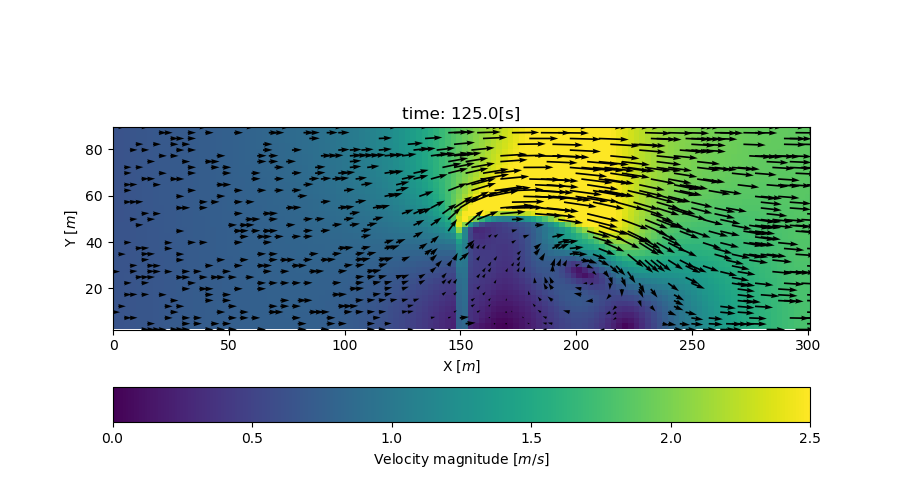

500


c:\users\ottevan\appdata\local\continuum\anaconda3\envs\paotm3.7\lib\site-packages\numpy\ctypeslib.py:436: RuntimeWarning: Invalid PEP 3118 format string: '<P'
  return array(obj, copy=False)


In [9]:
# set plot size
plt.rcParams["figure.figsize"] = (9, 5) # (w, h)

# link functions to widgets
run.on_click(run_model)
update.on_click(update_model)
restart.on_click(restart_model)

def set_plot(change):
    t = change['new']
    if (t < len(data)):
        im.set_data(data[t]["mag"])
#         vortscat.set_array(data[t]["magR"])
        plt.title("time: " + str(data[t]["time"]) + "[s]")
        quiver.set_UVC(data[t]["ucx"][randind], data[t]["ucy"][randind])
        fig.canvas.draw()
        
slider.observe(set_plot, 'value')

controls = HBox([run, update, restart])
params = VBox(items)

for i in items: 
    change_param(i)
    i.observe(change_param, names='value')

display(VBox([settings, HBox([nsteps, controls]), HBox([params])]))
fig, axs = plt.subplots(1, 1)
display(player)

im = axs.imshow(data[0]["mag"], extent=[xz.min(), xz.max(), yz.min(), yz.max()], vmin=0, vmax=2.5)
axs.set_xlabel("X $[m]$")
axs.set_ylabel("Y $[m]$")

# vortscat = axs.scatter(xz, yz, marker="s", c=data[0]["magR"], vmin=0, vmax=2)
quiver = axs.quiver(xz[randind], yz[randind], data[0]["ucx"][randind], data[0]["ucy"][randind], angles='xy', scale_units='xy', scale=0.2)
plt.title("time: " + str(data[0]["time"]) + "[s]")
cbar = plt.colorbar(im, orientation="horizontal");
cbar.ax.set_xlabel('Velocity magnitude $[m/s]$')
plt.draw()
